# Wilcoxon Rank-Sum Test (Mann-Whitney U Test)

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
from dependency_injector import containers, providers
import datetime
import random

# infrastructure
from application.infrastructure.repository.PandasDataFrameRepository import PandasDataFrameRepository
from application.infrastructure.repository.KMeansClusteringRepository import KMeansClusteringRepository
from application.infrastructure.repository.VRPOPProblemRepository import VRPOPProblemRepository
from application.infrastructure.repository.VRPProblemRepository import VRPProblemRepository
from application.infrastructure.repository.RandomProblemRepository import RandomProblemRepository
from application.infrastructure.repository.GreedyProblemRepository import GreedyProblemRepository
from application.infrastructure.repository.SAAlgorithmRepository import SAAlgorithmRepository

# use case
from application.use_case.RunVRPOPUseCase import RunVRPOPUseCase
from application.use_case.RunVRPUseCase import RunVRPUseCase
from application.use_case.RunRandomUseCase import RunRandomUseCase
from application.use_case.RunGreedyUseCase import RunGreedyUseCase

create dependency injector

In [3]:
class Container(containers.DeclarativeContainer):
    data_frame_repository = providers.Singleton(PandasDataFrameRepository)
    clustering_repository = providers.Singleton(KMeansClusteringRepository)
    vrpop_repository = providers.Singleton(VRPOPProblemRepository)
    vrp_repository = providers.Singleton(VRPProblemRepository)
    random_repository = providers.Singleton(RandomProblemRepository)
    greedy_repository = providers.Singleton(GreedyProblemRepository)
    sa_repository = providers.Singleton(SAAlgorithmRepository)

container = Container()

testing data

In [4]:
n_testing = 10
list_of_pois = []
for i in range(n_testing):
    list_of_pois.append(random.sample(range(1, 100), 40))
n_days = 5
hotel_id = 101

# Get testing result

## VRP-OP

In [5]:
use_case = RunVRPOPUseCase(
    container.data_frame_repository(),
    container.vrpop_repository(),
    container.sa_repository()
)

alfa = 0.7
beta = 0.3

sum_fitness_vrp_op = 0
sum_n_poi_vrp_op = 0
sum_duration_utilization_vrp_op = 0
sum_duration_vrp_op = datetime.timedelta(0)

list_fitness_vrp_op = []
list_n_poi_vrp_op = []
list_duration_utilization_vrp_op = []
list_duration_vrp_op = []

for i in range(n_testing):
    now = datetime.datetime.now()
    routes, fitness, n_poi, duration_utilization = use_case.execute(
        list_of_pois[0],
        n_days,
        hotel_id,
        alfa,
        beta
    )
    duration = datetime.datetime.now() - now

    sum_fitness_vrp_op += fitness
    sum_n_poi_vrp_op += n_poi
    sum_duration_utilization_vrp_op += duration_utilization
    sum_duration_vrp_op += duration

    list_fitness_vrp_op.append(fitness)
    list_n_poi_vrp_op.append(n_poi)
    list_duration_utilization_vrp_op.append(duration_utilization)
    list_duration_vrp_op.append(duration)

print('==============')
print('Total Quality       :', sum_fitness_vrp_op / n_testing)
print('# POI               :', sum_n_poi_vrp_op / n_testing)
print('Duration Utilization:', sum_duration_utilization_vrp_op / n_testing)
print('Running Time        :', sum_duration_vrp_op / n_testing)

Total Quality       : 0.47752255967385293
# POI               : 32.8
Duration Utilization: 83.30910256410256
Running Time        : 0:00:19.530500


## VRP

In [6]:
use_case = RunVRPUseCase(
    container.data_frame_repository(),
    container.vrpop_repository(),
    container.sa_repository()
)

sum_quality_vrp = 0
sum_n_poi_vrp = 0
sum_duration_utilization_vrp = 0
sum_duration_vrp = datetime.timedelta(0)

list_quality_vrp = []
list_n_poi_vrp = []
list_duration_utilization_vrp = []
list_duration_vrp = []

for i in range(n_testing):
    now = datetime.datetime.now()
    routes, total_quality, n_poi, duration_utilization = use_case.execute(
        list_of_pois[0],
        n_days,
        hotel_id,
        alfa,
        beta
    )
    duration = datetime.datetime.now() - now
    sum_quality_vrp += total_quality
    sum_n_poi_vrp += n_poi
    sum_duration_utilization_vrp += duration_utilization
    sum_duration_vrp += duration

    list_quality_vrp.append(total_quality)
    list_n_poi_vrp.append(n_poi)
    list_duration_utilization_vrp.append(duration_utilization)
    list_duration_vrp.append(duration)

print('==============')
print('Total Quality       :', sum_quality_vrp / n_testing)
print('# POI               :', sum_n_poi_vrp / n_testing)
print('Duration Utilization:', sum_duration_utilization_vrp / n_testing)
print('Running Time        :', sum_duration_vrp / n_testing)

Total Quality       : 0.47340966025428405
# POI               : 32.5
Duration Utilization: 82.31179487179487
Running Time        : 0:00:09.607751


## Random

In [7]:
use_case = RunRandomUseCase(
    container.data_frame_repository(),
    container.random_repository()
)

sum_quality_random = 0
sum_n_poi_random = 0
sum_duration_utilization_random = 0
sum_duration_random = datetime.timedelta(0)

list_quality_random = []
list_n_poi_random = []
list_duration_utilization_random = []
list_duration_random = []

for i in range(n_testing):
    now = datetime.datetime.now()
    routes, total_quality, n_poi, duration_utilization = use_case.execute(
        list_of_pois[0],
        n_days,
        hotel_id,
        alfa,
        beta
    )
    duration = datetime.datetime.now() - now
    sum_quality_random += total_quality
    sum_n_poi_random += n_poi
    sum_duration_utilization_random += duration_utilization
    sum_duration_random += duration

    list_quality_random.append(total_quality)
    list_n_poi_random.append(n_poi)
    list_duration_utilization_random.append(duration_utilization)
    list_duration_random.append(duration)

print('==============')
print('Total Quality       :', sum_quality_random / n_testing)
print('# POI               :', sum_n_poi_random / n_testing)
print('Duration Utilization:', sum_duration_utilization_random / n_testing)
print('Running Time        :', sum_duration_random / n_testing)

Total Quality       : 0.4728395370646766
# POI               : 32.1
Duration Utilization: 78.90115384615385
Running Time        : 0:00:00.742710


## Greedy

In [8]:
use_case = RunGreedyUseCase(
    container.data_frame_repository(),
    container.greedy_repository()
)

sum_quality_greedy = 0
sum_n_poi_greedy = 0
sum_duration_utilization_greedy = 0
sum_duration_greedy = datetime.timedelta(0)

list_quality_greedy = []
list_n_poi_greedy = []
list_duration_utilization_greedy = []
list_duration_greedy = []

for i in range(n_testing):
    now = datetime.datetime.now()
    routes, total_quality, n_poi, duration_utilization = use_case.execute(
        list_of_pois[0],
        n_days,
        hotel_id,
        alfa,
        beta
    )
    duration = datetime.datetime.now() - now
    sum_quality_greedy += total_quality
    sum_n_poi_greedy += n_poi
    sum_duration_utilization_greedy += duration_utilization
    sum_duration_greedy += duration

    list_quality_greedy.append(total_quality)
    list_n_poi_greedy.append(n_poi)
    list_duration_utilization_greedy.append(duration_utilization)
    list_duration_greedy.append(duration)

print('==============')
print('Total Quality       :', sum_quality_greedy / n_testing)
print('# POI               :', sum_n_poi_greedy / n_testing)
print('Duration Utilization:', sum_duration_utilization_greedy / n_testing)
print('Running Time        :', sum_duration_greedy / n_testing)

Total Quality       : 0.46376615035931434
# POI               : 32.0
Duration Utilization: 83.1128205128205
Running Time        : 0:00:01.699086


# Generate Sample Data

Let's create two samples with slightly different distributions to test:
- Sample 1: Normal distribution with mean=0
- Sample 2: Normal distribution with mean

Text(0.5, 1.0, 'Distribution of Two Samples')

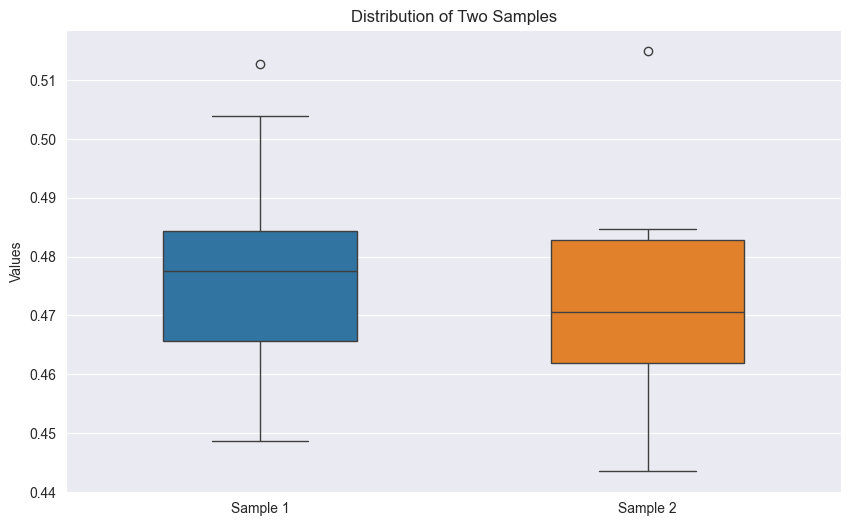

In [9]:
# Generate sample data
sample1 = np.random.normal(0, 1, 100)  # Mean=0, SD=1, Size=100
sample2 = np.random.normal(0.5, 1, 100)  # Mean=0.5, SD=1, Size=100

# Create box plots to visualize the distributions
plt.figure(figsize=(10, 6))
sns.boxplot(data=[list_fitness_vrp_op, list_quality_vrp], width=0.5)
plt.xticks([0, 1], ['Sample 1', 'Sample 2'])
plt.ylabel('Values')
plt.title('Distribution of Two Samples')

# Perform Wilcoxon Rank-Sum Test
Now we'll perform the test using scipy.stats.ranksums function.

The null hypothesis is that the two samples come from the same distribution.
The alternative hypothesis is that the two samples

## Fitness value

### VRP

In [12]:
# Perform Wilcoxon rank-sum test
statistic, p_value = stats.ranksums(list_fitness_vrp_op, list_quality_vrp)

print(f"Wilcoxon rank-sum test results:")
print(f"Test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
print("\nInterpretation:")
if p_value < alpha:
    print(f"Since p-value ({p_value:.4f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("The two samples likely come from different distributions.")
else:
    print(f"Since p-value ({p_value:.4f}) >= alpha ({alpha}), we fail to reject the null hypothesis.")
    print("We don't have enough evidence to say the samples come from different distributions.")

Wilcoxon rank-sum test results:
Test statistic: 0.4536
p-value: 0.6501

Interpretation:
Since p-value (0.6501) >= alpha (0.05), we fail to reject the null hypothesis.
We don't have enough evidence to say the samples come from different distributions.


### Random

In [15]:
# Perform Wilcoxon rank-sum test
statistic, p_value = stats.ranksums(list_fitness_vrp_op, list_quality_random)

print(f"Wilcoxon rank-sum test results:")
print(f"Test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
print("\nInterpretation:")
if p_value < alpha:
    print(f"Since p-value ({p_value:.4f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("The two samples likely come from different distributions.")
else:
    print(f"Since p-value ({p_value:.4f}) >= alpha ({alpha}), we fail to reject the null hypothesis.")
    print("We don't have enough evidence to say the samples come from different distributions.")

Wilcoxon rank-sum test results:
Test statistic: 0.6047
p-value: 0.5453

Interpretation:
Since p-value (0.5453) >= alpha (0.05), we fail to reject the null hypothesis.
We don't have enough evidence to say the samples come from different distributions.


### Greedy

In [16]:
# Perform Wilcoxon rank-sum test
statistic, p_value = stats.ranksums(list_fitness_vrp_op, list_quality_greedy)

print(f"Wilcoxon rank-sum test results:")
print(f"Test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
print("\nInterpretation:")
if p_value < alpha:
    print(f"Since p-value ({p_value:.4f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("The two samples likely come from different distributions.")
else:
    print(f"Since p-value ({p_value:.4f}) >= alpha ({alpha}), we fail to reject the null hypothesis.")
    print("We don't have enough evidence to say the samples come from different distributions.")

Wilcoxon rank-sum test results:
Test statistic: 2.2678
p-value: 0.0233

Interpretation:
Since p-value (0.0233) < alpha (0.05), we reject the null hypothesis.
The two samples likely come from different distributions.


## Number of POI

### VRP

In [17]:
# Perform Wilcoxon rank-sum test
statistic, p_value = stats.ranksums(list_n_poi_vrp_op, list_n_poi_vrp)

print(f"Wilcoxon rank-sum test results:")
print(f"Test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
print("\nInterpretation:")
if p_value < alpha:
    print(f"Since p-value ({p_value:.4f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("The two samples likely come from different distributions.")
else:
    print(f"Since p-value ({p_value:.4f}) >= alpha ({alpha}), we fail to reject the null hypothesis.")
    print("We don't have enough evidence to say the samples come from different distributions.")

Wilcoxon rank-sum test results:
Test statistic: 0.7181
p-value: 0.4727

Interpretation:
Since p-value (0.4727) >= alpha (0.05), we fail to reject the null hypothesis.
We don't have enough evidence to say the samples come from different distributions.


### Random

In [18]:
# Perform Wilcoxon rank-sum test
statistic, p_value = stats.ranksums(list_n_poi_vrp_op, list_n_poi_random)

print(f"Wilcoxon rank-sum test results:")
print(f"Test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
print("\nInterpretation:")
if p_value < alpha:
    print(f"Since p-value ({p_value:.4f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("The two samples likely come from different distributions.")
else:
    print(f"Since p-value ({p_value:.4f}) >= alpha ({alpha}), we fail to reject the null hypothesis.")
    print("We don't have enough evidence to say the samples come from different distributions.")

Wilcoxon rank-sum test results:
Test statistic: 1.3607
p-value: 0.1736

Interpretation:
Since p-value (0.1736) >= alpha (0.05), we fail to reject the null hypothesis.
We don't have enough evidence to say the samples come from different distributions.


### Greedy

In [20]:
# Perform Wilcoxon rank-sum test
statistic, p_value = stats.ranksums(list_n_poi_vrp_op, list_n_poi_greedy)

print(f"Wilcoxon rank-sum test results:")
print(f"Test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
print("\nInterpretation:")
if p_value < alpha:
    print(f"Since p-value ({p_value:.4f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("The two samples likely come from different distributions.")
else:
    print(f"Since p-value ({p_value:.4f}) >= alpha ({alpha}), we fail to reject the null hypothesis.")
    print("We don't have enough evidence to say the samples come from different distributions.")

Wilcoxon rank-sum test results:
Test statistic: 1.8898
p-value: 0.0588

Interpretation:
Since p-value (0.0588) >= alpha (0.05), we fail to reject the null hypothesis.
We don't have enough evidence to say the samples come from different distributions.


## Average daily utilization

### VRP

In [21]:
# Perform Wilcoxon rank-sum test
statistic, p_value = stats.ranksums(list_duration_utilization_vrp_op, list_duration_utilization_vrp)

print(f"Wilcoxon rank-sum test results:")
print(f"Test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

print("\nInterpretation:")
if p_value < alpha:
    print(f"Since p-value ({p_value:.4f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("The two samples likely come from different distributions.")
else:
    print(f"Since p-value ({p_value:.4f}) >= alpha ({alpha}), we fail to reject the null hypothesis.")
    print("We don't have enough evidence to say the samples come from different distributions.")

Wilcoxon rank-sum test results:
Test statistic: 0.9071
p-value: 0.3643

Interpretation:
Since p-value (0.3643) >= alpha (0.05), we fail to reject the null hypothesis.
We don't have enough evidence to say the samples come from different distributions.


### Random

In [22]:
# Perform Wilcoxon rank-sum test
statistic, p_value = stats.ranksums(list_duration_utilization_vrp_op, list_duration_utilization_random)

print(f"Wilcoxon rank-sum test results:")
print(f"Test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

print("\nInterpretation:")
if p_value < alpha:
    print(f"Since p-value ({p_value:.4f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("The two samples likely come from different distributions.")
else:
    print(f"Since p-value ({p_value:.4f}) >= alpha ({alpha}), we fail to reject the null hypothesis.")
    print("We don't have enough evidence to say the samples come from different distributions.")

Wilcoxon rank-sum test results:
Test statistic: 3.0237
p-value: 0.0025

Interpretation:
Since p-value (0.0025) < alpha (0.05), we reject the null hypothesis.
The two samples likely come from different distributions.


### Greedy

In [24]:
# Perform Wilcoxon rank-sum test
statistic, p_value = stats.ranksums(list_duration_utilization_vrp_op, list_duration_utilization_greedy)

print(f"Wilcoxon rank-sum test results:")
print(f"Test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

print("\nInterpretation:")
if p_value < alpha:
    print(f"Since p-value ({p_value:.4f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("The two samples likely come from different distributions.")
else:
    print(f"Since p-value ({p_value:.4f}) >= alpha ({alpha}), we fail to reject the null hypothesis.")
    print("We don't have enough evidence to say the samples come from different distributions.")

Wilcoxon rank-sum test results:
Test statistic: 0.0000
p-value: 1.0000

Interpretation:
Since p-value (1.0000) >= alpha (0.05), we fail to reject the null hypothesis.
We don't have enough evidence to say the samples come from different distributions.
